In [1]:
import numpy as np
import pandas as pd

from google.colab import files
import io

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [471]:
df = pd.read_csv(io.BytesIO(uploaded['diabetic_data.csv']))

# **EDA**

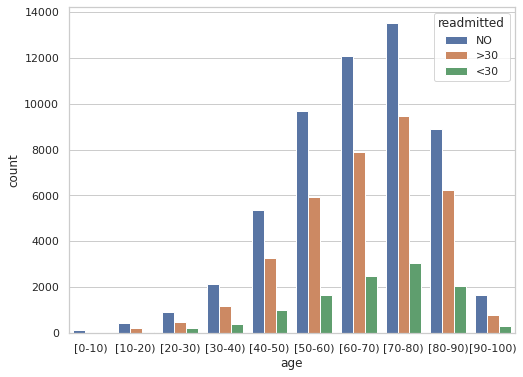

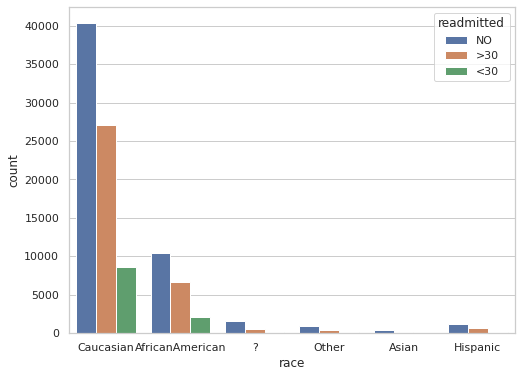

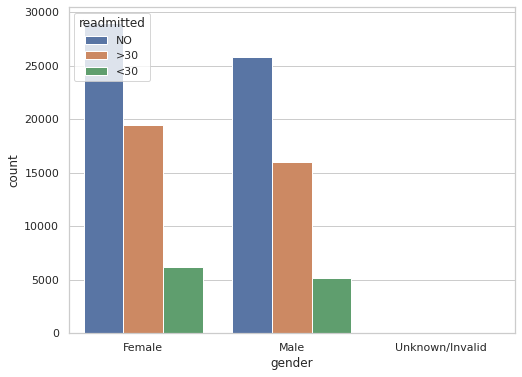

In [469]:
plt.figure(figsize= (8,6))
sns.countplot(data= df, x= 'age', hue= 'readmitted')

plt.figure(figsize= (8,6))
sns.countplot(data= df, x= 'race', hue= 'readmitted')

plt.figure(figsize= (8,6))
sns.countplot(data= df, x= 'gender', hue= 'readmitted')


# **Cleaning the Data**

In [472]:
df.replace({'?': None,'Unknown/Invalid': None}, inplace= True)
df.dropna(axis= 0,subset= ['race', 'gender'],inplace= True)
df.dropna(axis= 1,inplace= True)

In [473]:
race = pd.get_dummies(df['race'])
gender = pd.get_dummies(df['gender'])
age = pd.get_dummies(df['age'])
A1Cresult = pd.get_dummies(df['A1Cresult'], prefix= 'A1Cresult').drop(['A1Cresult_None'], axis= 1)
medi = pd.get_dummies(df[['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                         'acetohexamide','glipizide','glyburide','tolbutamide', 'pioglitazone',
                         'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                         'examide', 'citoglipton', 'insulin', 'glyburide-metformin','glipizide-metformin',
                         'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']])

change = pd.get_dummies(df['change'],prefix= 'change')
diabetesMed = pd.get_dummies(df['diabetesMed'], prefix= 'diabetesMed')


codes, uniques = pd.factorize(df['readmitted'])

for i in range(len(codes)):
    if(codes[i] == 2):
        codes[i] = 1

readmitted_np = np.array(codes)
readmitted_df = pd.DataFrame(data= readmitted_np, columns= ['readmitted_NO_YES'], dtype= np.float64)

In [474]:
dropped = ['race','gender','age','max_glu_serum','A1Cresult','admission_type_id','admission_source_id',
           'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
           'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
           'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
           'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed',
           'readmitted']
df.drop(dropped, axis= 1, inplace= True)

In [475]:
df = pd.concat([race, gender, age, A1Cresult, medi, change, diabetesMed, readmitted_df], axis= 1)

In [476]:
df.dropna(inplace= True)

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97287 entries, 0 to 99491
Data columns (total 95 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AfricanAmerican                  97287 non-null  float64
 1   Asian                            97287 non-null  float64
 2   Caucasian                        97287 non-null  float64
 3   Hispanic                         97287 non-null  float64
 4   Other                            97287 non-null  float64
 5   Female                           97287 non-null  float64
 6   Male                             97287 non-null  float64
 7   [0-10)                           97287 non-null  float64
 8   [10-20)                          97287 non-null  float64
 9   [20-30)                          97287 non-null  float64
 10  [30-40)                          97287 non-null  float64
 11  [40-50)                          97287 non-null  float64
 12  [50-60)           

In [478]:
df.head(20)

,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,...,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_NO_YES
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0

# **Regression Modeling**

**Libraries**

In [479]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import  classification_report, plot_confusion_matrix, r2_score

# **Logistic**

In [452]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('readmitted_NO_YES', axis= 1), df['readmitted_NO_YES'],
                                                          test_size= .3, random_state= 666)

In [448]:
logmodel = LogisticRegression(max_iter= 20000)

logmodel.fit(x_train, y_train)

predict_lg = logmodel.predict(x_test)

In [449]:
logmodel.score(x_test, y_test)

0.5348271490732175

In [450]:
print(classification_report(y_test, predict_lg))

              precision    recall  f1-score   support

         0.0       0.54      0.99      0.69     15612
         1.0       0.50      0.01      0.02     13575

    accuracy                           0.53     29187
   macro avg       0.52      0.50      0.36     29187
weighted avg       0.52      0.53      0.38     29187



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


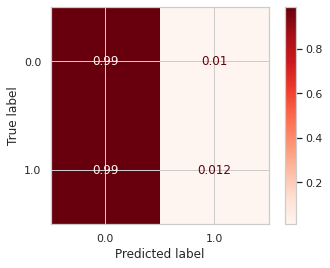

In [451]:
plot_confusion_matrix(logmodel, x_test, y_test, cmap= plt.cm.Reds, normalize= 'true')

# **Linear**

In [485]:
x_features = df.drop('readmitted_NO_YES', axis= 1)
y_target = df['readmitted_NO_YES']

lineReg = LinearRegression()

lineReg.fit(x_features, y_target)

print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept -9272973152447.32 


In [486]:
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 94 


In [498]:
X_train, X_test, Y_train, Y_test = train_test_split(x_features,y_target)

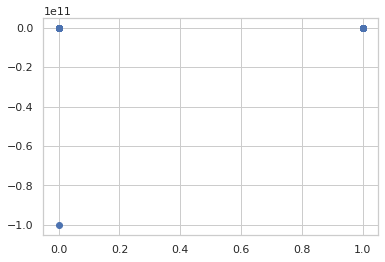

In [497]:
lineReg.fit(X_train,Y_train)

y_test_predict = lineReg.predict(X_test)

plt.scatter(Y_test, y_test_predict)